# Solving/Comparing ODEs

#Euler Method



$$
y^{\prime}(x_0,y_0) \approx \frac{y(x)-y_0}{x-x_{0}}
$$

which leads to: 

$$
y_{n+1} = y_{n} + hf(x_n, y_n)
$$


## Leap-frog Method

$$
y^{\prime} (x_{n}, y_{n})\approx \frac{y_{n+1} - y_{n-1}}{2 h} 
$$

which leads to:

$$
y_{n+1} = y_{n-1} + 2hf(x_{n}, y_{n})
$$

## Runge-Kutta Method (2)

Compute the derivative at a point half-way between the $x_0$ and $x$, refining Euler.
$$
x_{half} = x_{0} + \frac{h}{2}
$$

and 

$$
y_{half}  = y_{0} + \frac{h}{2}y^{\prime}(x_{0},y_{0})
$$

with these two expressions we can calculate $y^{\prime}= f(x_{half}, y_{half})$. With this value of the derivative the value of the function at $x_0 + h$ is computed as

$$
y_{1} = y_{0} + hy^{\prime} 
$$

## Runge-Kutta Method (4)

This algorithm represents a further improvement. In this case the slope that is used to make the step is a weighted average of different slopes

$$
{\mathrm{slope}} = \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4),
$$
where, 

* $k_1$ is the slope at the beginning of the inteval
* $k_2$ is the slope at the middle of the interval, using $k_1$ to determine the value of $y$.
* $k_3$ is the slope at the middle of the interval, but this time using $k_2$ to determine the value of $y$.
* $k_4$ is the slope at the end point, with its value determined using $k_3$

That is:

$$
\begin{align}
k_1 &= f(t_n, y_n), \\
k_2 &= f(t_n + \tfrac{h}{2}, y_n + \tfrac{h}{2}k_1), \\
k_3 &= f(t_n + \tfrac{h}{2}, y_n + \tfrac{h}{2}k_2), \\
k_4 &= f(t_n + h, y_n + h k_3).
\end{align}
$$

## Exercise 1

Solve the differential equation $y^{\prime} = 1+y^2$ in the interval $0 < x <1$ and the boundary condition $y(0)=0$. For each of the four methods explained above. (Euler, Leap-frog, Runge-Kutta2, Runge-Kutta4):
- Define the method
- Plot the function
- Plot the error to compare the numerical solution against the analytical solution.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# definir función a calcular
def func_yprima(x,y):
    return (1 + y**2)

# definir solucion analítica
def func_an(y):
    return tan(y)

In [3]:
##-- función m_euler --##
# calcular el método de euler para resolver ODEs de la forma y'= yprima, y valores de x_min,x_max y y0
# -input-:
## h: paso de la función, tipo float.
## x_min: cota inferior del dominio, tipo float.
## x_max: cota superior del dominio, tipo float.
## y0: condicion inicial: y[0]= y0, tipo float.
## yprima: ecuación diferencial y'= yprima, tipo función.
# -output-: 
## La función entrega un arreglo numérico con el resultado de la ecuación diferencial para cada punto del dominio.
def m_euler(h,x_min,x_max, y0, yprima):
    x = arange(x_min,x_max,h)
    y = zeros(len(x))
    y[0]=y0
    h = x[1]-x[0]
    for i in range(1,len(y)):
        var = yprima(x[i-1],y[i-1])
        y[i] = y[i-1] + h*var
    return(x,y)

In [4]:
##-- función m_leapfrog --##
# calcular el método de leap-frog para resolver ODEs de la forma y'= yprima, y valores de x_min,x_max y y0
# -input-:
## h: paso de la función, tipo float.
## x_min: cota inferior del dominio, tipo float.
## x_max: cota superior del dominio, tipo float.
## y0: condicion inicial: y[0]= y0, tipo float.
## yprima: ecuación diferencial y'= yprima, tipo función.
# -output-: 
## La función entrega un arreglo numérico con el resultado de la ecuación diferencial para cada punto del dominio.
def m_leapfrog(h,x_min,x_max, y0, yprima):
    x = arange(x_min,x_max,h)
    y = zeros(len(x))
    x[0] = x_min
    y[0] = y0
    x[1] = x_min + h
    y[1] = y[0] + h*func_yprima(x[0],y[0])
    
    y[0]=y0
    h = x[1]-x[0]
    for i in range(2,len(y)):
        var = yprima(x[i-1],y[i-1])
        x[i] = x[i-1] + h
        y[i] = y[i-2] + 2*h*var
    return(x,y)


### Insertar acá su solución para los métodos restantes...

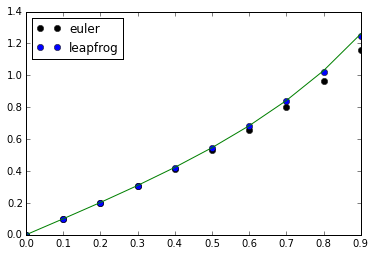

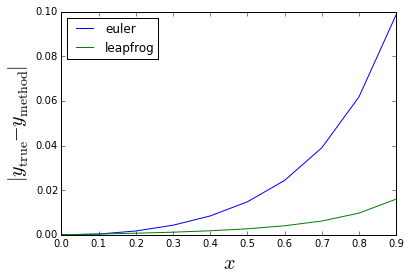

In [5]:
## Parámetros y Evaluaciones para los distintos métodos
h = 0.1
x_min = 0
x_max = 1
y0 = 0

x,y = m_euler(h,x_min,x_max,y0,func_yprima)
z,w = m_leapfrog(h,x_min,x_max,y0,func_yprima)
plot(x,y,'ko', label = "euler")
plot(z,w,'o', label = "leapfrog")
plot(x,func_an(x))
legend(loc='upper left')

show()
plot(x,abs(func_an(x)-y), label = "euler")
plt.xlabel('$x$', size=20)
plt.ylabel('$|y_{\mathrm{true}}-y_{\mathrm{method}}|$',size=20)
plot(x,abs(func_an(x)-w), label = "leapfrog")
legend(loc='upper left') 

## Exercise 2

Solve the following differential equation using all the methods mentioned above

$$
\frac{\mathrm{d}x}{\mathrm{d}t} = -x^3 + \sin(t)
$$

## Exercise 3

Take an idealised pendulum: a weightless string of length $\ell$, fixed at one end with a mass $m$ at the other. The pendulum:
- Is free to swing in a plane subject to gravity.
- Has a friction proportional to its velocity $v$.
- May be driven by an external periodic force $F_d \cos {\omega_d t}$.

We want to consider angular displacement, so substitute $\dot{x} = \ell \dot{\theta}$ and $\ddot{x} = \ell \ddot{\theta}$, and now apply the driving force 

$$ m \ell \ddot{\theta} + k \ell \dot{\theta} + mg \sin{\theta} = F_d \cos {\omega_d t} $$

We can re-write this 2nd order ODEs as a set of coupled first-order ODEs:

Let $y_0 = \theta$, $y_1 = \dot{\theta}$ and $y_2 = \ddot{\theta}$:

$$ 
\begin{align*}
y_0' &= y_1 = \dot{\theta} \\
y_1' &= y_2 = \ddot{\theta} = -\frac{k}{m}\dot{\theta} - \frac{g}{\ell} \sin{\theta} + \frac{F_d}{m \ell} cos{\omega_d t}
\end{align*}
$$


Using a simple change of variable: $\alpha = g/\ell$, $\beta = k/m$ and $\gamma = F/m\ell$

$$
\begin{align*}
y_0' &= y_1 \\
y_1' &= -\alpha \sin{y_0} -\beta y_1 + \gamma \cos{\omega t}
\end{align*}
$$

Using the methods described above:

- Solve without friction & external force.
- Solve without external force.
- Solve without friction.
- Solve for all forces!

